In [7]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import glob
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [8]:
ruta = r"C:/Users/Alejandro Moya/Documents/Sexto semestre/Dataviz/Python/PRSA_Data_20130301-20170228\PRSA_Data_Dongsi_20130301-20170228.csv"

df = pd.read_csv(ruta)
df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi

In [9]:
# Crear columna datetime
df["datetime"] = pd.to_datetime(
    df[["year", "month", "day", "hour"]]
)

# Establecer como índice
df = df.set_index("datetime")

df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2  \
datetime                                                                  
2013-03-01 00:00:00   1  2013      3    1     0    9.0   9.0  3.0  17.0   
2013-03-01 01:00:00   2  2013      3    1     1    4.0   4.0  3.0  16.0   
2013-03-01 02:00:00   3  2013      3    1     2    7.0   7.0  NaN  17.0   
2013-03-01 03:00:00   4  2013      3    1     3    3.0   3.0  5.0  18.0   
2013-03-01 04:00:00   5  2013      3    1     4    3.0   3.0  7.0   NaN   

                        CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM station  
datetime                                                                       
2013-03-01 00:00:00  300.0  89.0  -0.5  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
2013-03-01 01:00:00  300.0  88.0  -0.7  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2013-03-01 02:00:00  300.0  60.0  -1.2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
2013-03-01 03:00:00    NaN   NaN  -1.4  1026.2 -25.5   0.0    N   4.9  Dongsi  
2013-03-01 04:00:00  200.0  84.0  -1.9  1027.1 -24.5   0.0  NNW   3.2  Dongsi

In [10]:
# Eliminamos columnas que no necesitaremos
df.drop(columns=["No", "station"], inplace=True)
df.head()

year  month  day  hour  PM2.5  PM10  SO2   NO2     CO  \
datetime                                                                     
2013-03-01 00:00:00  2013      3    1     0    9.0   9.0  3.0  17.0  300.0   
2013-03-01 01:00:00  2013      3    1     1    4.0   4.0  3.0  16.0  300.0   
2013-03-01 02:00:00  2013      3    1     2    7.0   7.0  NaN  17.0  300.0   
2013-03-01 03:00:00  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   
2013-03-01 04:00:00  2013      3    1     4    3.0   3.0  7.0   NaN  200.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  
datetime                                                        
2013-03-01 00:00:00  89.0  -0.5  1024.5 -21.4   0.0  NNW   5.7  
2013-03-01 01:00:00  88.0  -0.7  1025.1 -22.1   0.0   NW   3.9  
2013-03-01 02:00:00  60.0  -1.2  1025.3 -24.6   0.0  NNW   5.3  
2013-03-01 03:00:00   NaN  -1.4  1026.2 -25.5   0.0    N   4.9  
2013-03-01 04:00:00  84.0  -1.9  1027.1 -24.5   0.0  NNW   3.2

In [11]:
df.shape


(35064, 16)

In [12]:
df.dtypes

year       int64
month      int64
day        int64
hour       int64
PM2.5    float64
PM10     float64
SO2      float64
NO2      float64
CO       float64
O3       float64
TEMP     float64
PRES     float64
DEWP     float64
RAIN     float64
wd        object
WSPM     float64
dtype: object

In [13]:
df.isna().sum()

year        0
month       0
day         0
hour        0
PM2.5     750
PM10      553
SO2       663
NO2      1601
CO       3197
O3        664
TEMP       20
PRES       20
DEWP       20
RAIN       20
wd         78
WSPM       14
dtype: int64

In [14]:
print((df.isna().mean() * 100).round(2))

year     0.00
month    0.00
day      0.00
hour     0.00
PM2.5    2.14
PM10     1.58
SO2      1.89
NO2      4.57
CO       9.12
O3       1.89
TEMP     0.06
PRES     0.06
DEWP     0.06
RAIN     0.06
wd       0.22
WSPM     0.04
dtype: float64


In [15]:
df.describe().T

count         mean          std        min      25%        50%  \
year   35064.0  2014.662560     1.177213  2013.0000  2014.00  2015.0000   
month  35064.0     6.522930     3.448752     1.0000     4.00     7.0000   
day    35064.0    15.729637     8.800218     1.0000     8.00    16.0000   
hour   35064.0    11.500000     6.922285     0.0000     5.75    11.5000   
PM2.5  34314.0    86.194297    86.575127     3.0000    22.00    61.0000   
PM10   34511.0   110.336742    98.219860     2.0000    38.00    86.0000   
SO2    34401.0    18.531107    22.905655     0.2856     4.00    10.0000   
NO2    33463.0    53.699443    33.959230     2.0000    27.00    47.0000   
CO     31867.0  1330.069131  1191.305887   100.0000   600.00  1000.0000   
O3     34400.0    57.210637    58.033275     0.6426    12.00    44.1252   
TEMP   35044.0    13.671490    11.458418   -16.8000     3.10    14.6000   
PRES   35044.0  1012.547419    10.266059   987.1000  1004.00  1012.2000   
DEWP   35044.0     2.447535    13.810696   -35.3000    -8.80     3.0000   
RAIN   35044.0     0.064020     0.786282     0.0000     0.00     0.0000   
WSPM   35050.0     1.860785     1.280368     0.0000     1.00     1.5000   

           75%      max  
year   2016.00   2017.0  
month    10.00     12.0  
day      23.00     31.0  
hour     17.25     23.0  
PM2.5   119.00    737.0  
PM10    151.00    955.0  
SO2      24.00    300.0  
NO2      73.00    258.0  
CO     1700.00  10000.0  
O3       81.00   1071.0  
TEMP     23.50     41.1  
PRES   1020.90   1042.0  
DEWP     15.00     28.8  
RAIN      0.00     46.4  
WSPM      2.40     10.5

In [16]:
import plotly.express as px

# Suponiendo que tu DataFrame se llama df y tiene índice de fechas
fig = px.line(df, x=df.index, y="PM2.5", title="Evolución de PM2.5")
fig.update_traces(line_color="red")
fig.update_layout(
    xaxis_title="Fecha",
    yaxis_title="PM2.5",
    template="plotly_white"
)
fig.show()

In [17]:
# --- Histogramas ---
# Histograma por meses (acumulado de todos los años)
fig_hist_mes = px.histogram(df, x="month", y="PM2.5", histfunc="avg",
                            title="Histograma de PM2.5 por mes (promedio)")
fig_hist_mes.update_layout(xaxis=dict(tickmode='linear'))
fig_hist_mes.show()

# Histograma por años
fig_hist_anio = px.histogram(df, x="year", y="PM2.5", histfunc="avg",
                             title="Histograma de PM2.5 por año (promedio)")
fig_hist_anio.update_layout(xaxis=dict(tickmode='linear'))
fig_hist_anio.show()

# --- Boxplots ---
# Boxplot por mes
fig_box_mes = px.box(df, x="month", y="PM2.5",
                     title="Distribución de PM2.5 por mes")
fig_box_mes.show()

# Boxplot por año
fig_box_anio = px.box(df, x="year", y="PM2.5",
                      title="Distribución de PM2.5 por año")
fig_box_anio.show()

In [18]:
# --- Agrupamos antes de graficar (reduce mucho la RAM) ---
df_grouped = df.groupby(["year", "month"])["PM2.5"].mean().reset_index()

# --- Preparamos colores personalizados ---
np.random.seed(100)
mycolors = np.random.choice(
    list(mpl.colors.XKCD_COLORS.values()),  # Colores en formato hex
    len(df_grouped["year"].unique()), 
    replace=False
)

# --- Graficamos con Plotly ---
fig = px.line(
    df_grouped, 
    x="month", 
    y="PM2.5", 
    color="year",
    markers=True,
    title="Seasonal Plot de PM2.5 por Año",
    color_discrete_sequence=mycolors  # usamos tus colores
)

fig.update_layout(
    xaxis=dict(title="Mes", tickmode="linear", dtick=1),
    yaxis_title="PM2.5 promedio",
    title_font=dict(size=20),
    legend_title_text="Año"
)

fig.show()

La celda de abajo no funciona porque tengo faltantes

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['PM2.5'].dropna(), model='multiplicative', extrapolate_trend='freq')
# Additive Decomposition
result_add = seasonal_decompose(df['PM2.5'].dropna(), model='additive', extrapolate_trend='freq')
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

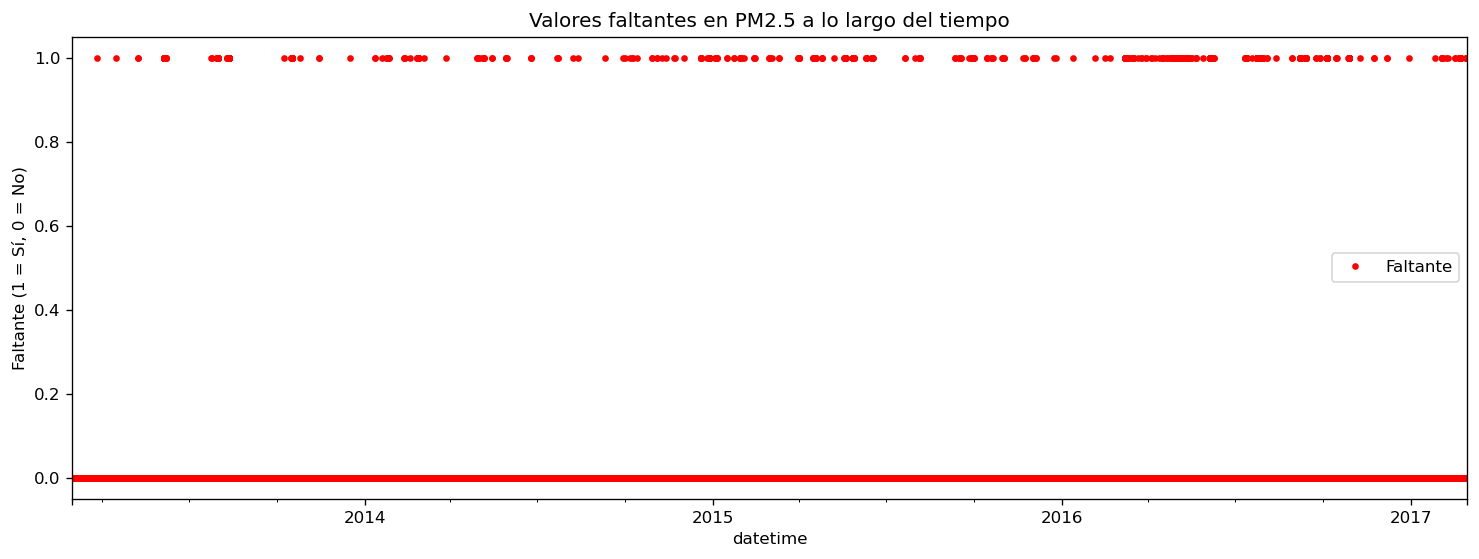

In [ ]:
plt.figure(figsize=(15,5))
df['PM2.5'].isna().astype(int).plot(
    linestyle='', marker='o', color='red', markersize=3, label='Faltante'
)
plt.title("Valores faltantes en PM2.5 a lo largo del tiempo")
plt.ylabel("Faltante (1 = Sí, 0 = No)")
plt.legend()
plt.show()

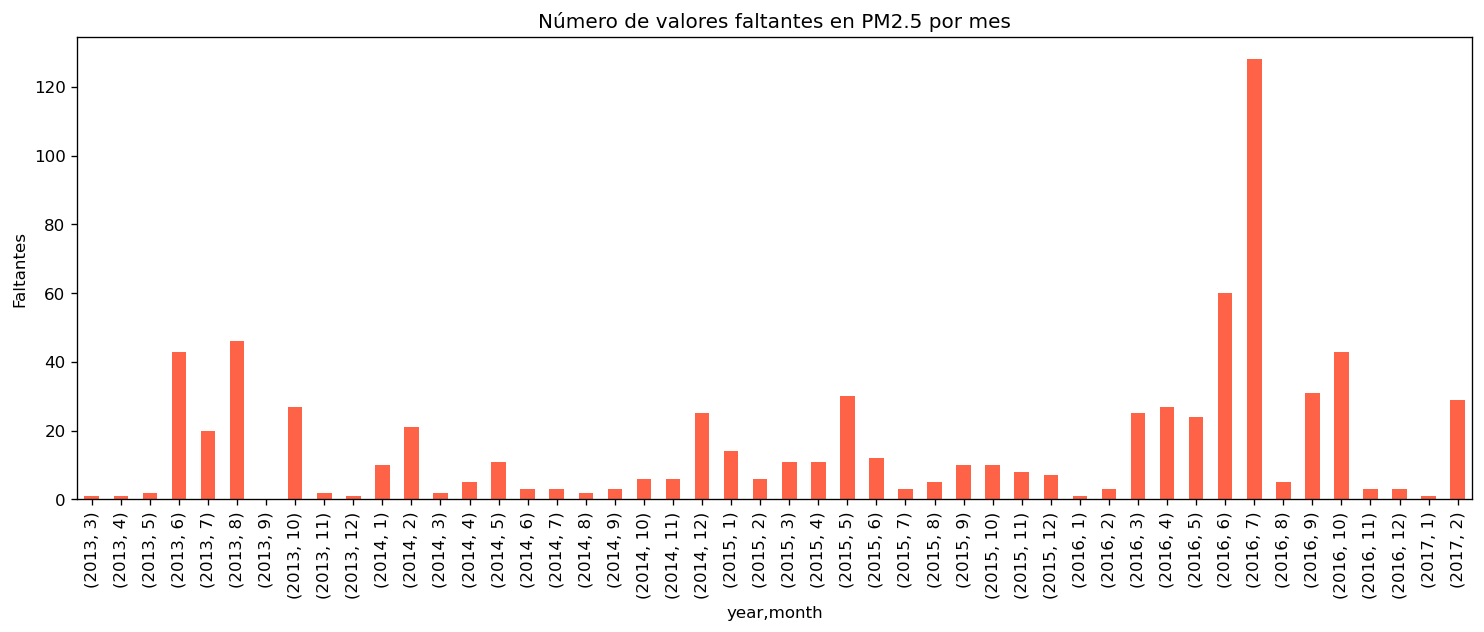

In [ ]:
faltantes_mes = df.groupby(['year','month'])['PM2.5'].apply(lambda x: x.isna().sum())

faltantes_mes.plot(kind='bar', figsize=(15,5), color='tomato')
plt.title("Número de valores faltantes en PM2.5 por mes")
plt.ylabel("Faltantes")
plt.show()

Resumen estadístico PM2.5:
count    34314.000000
mean        86.194297
std         86.575127
min          3.000000
25%         22.000000
50%         61.000000
75%        119.000000
max        737.000000
Name: PM2.5, dtype: float64

Resumen estadístico PM10:
count    34511.000000
mean       110.336742
std         98.219860
min          2.000000
25%         38.000000
50%         86.000000
75%        151.000000
max        955.000000
Name: PM10, dtype: float64


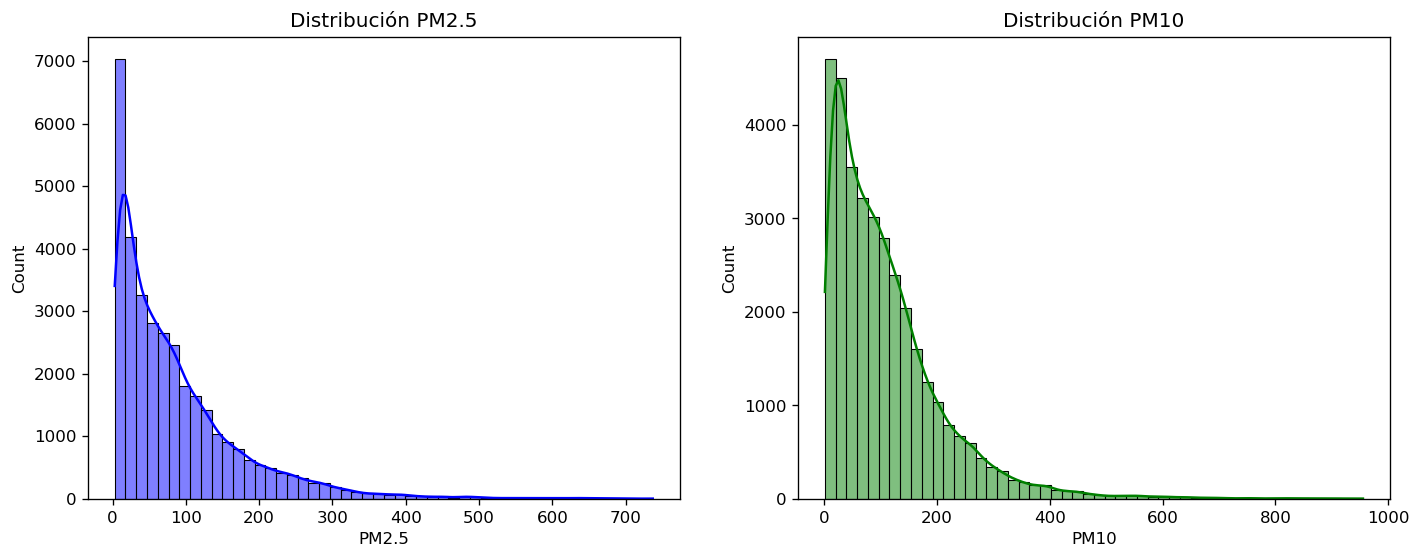

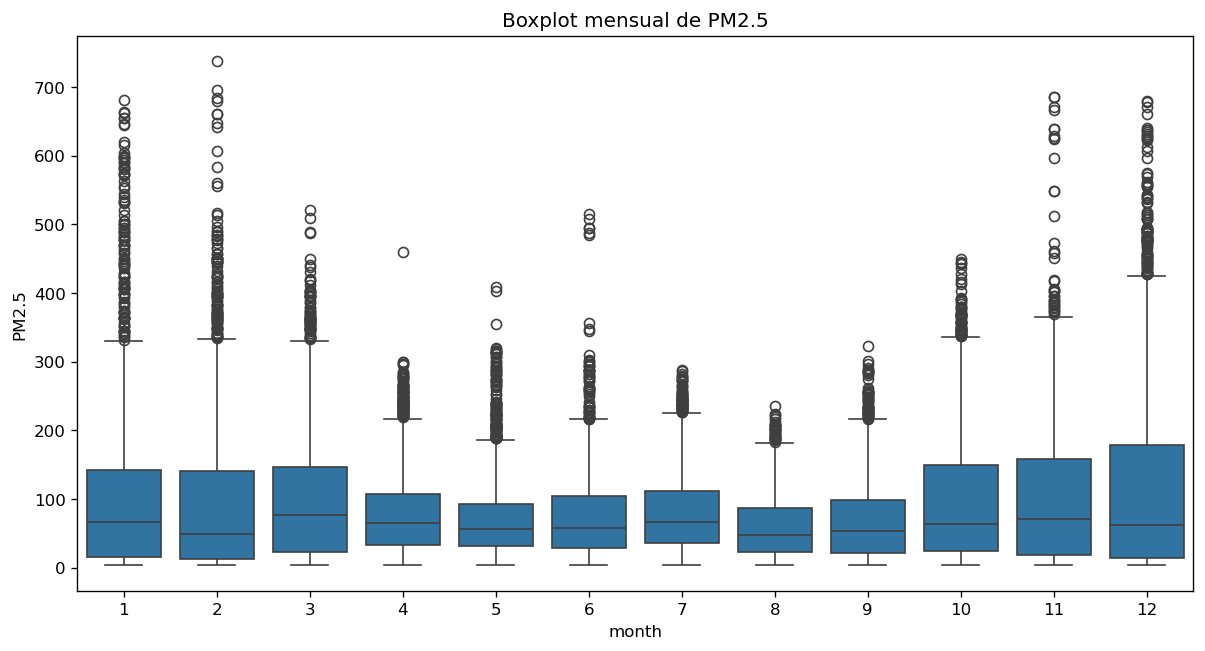

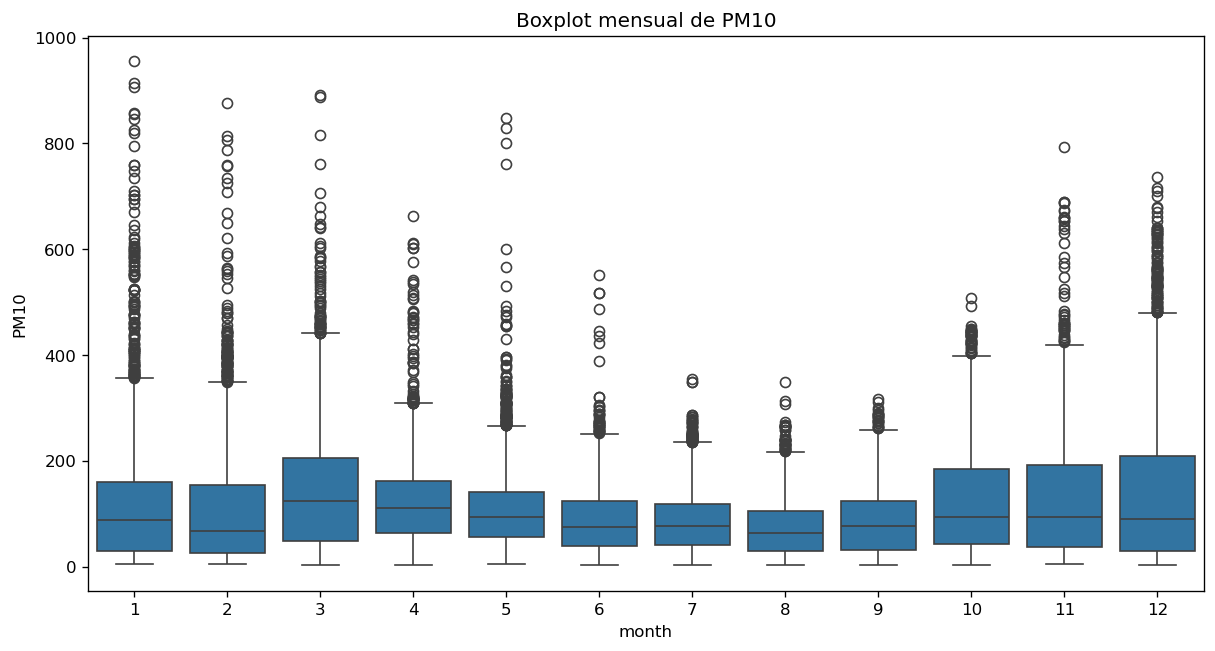

In [ ]:
print("Resumen estadístico PM2.5:")
print(df['PM2.5'].describe())
print("\nResumen estadístico PM10:")
print(df['PM10'].describe())

# Histogramas
fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.histplot(df['PM2.5'].dropna(), bins=50, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribución PM2.5')

sns.histplot(df['PM10'].dropna(), bins=50, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribución PM10')
plt.show()

# Boxplots por mes (para ver estacionalidad)
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='PM2.5', data=df)
plt.title('Boxplot mensual de PM2.5')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='PM10', data=df)
plt.title('Boxplot mensual de PM10')
plt.show()


Resumen estadístico general:
         count         mean          std        min      25%        50%  \
year   35064.0  2014.662560     1.177213  2013.0000  2014.00  2015.0000   
month  35064.0     6.522930     3.448752     1.0000     4.00     7.0000   
day    35064.0    15.729637     8.800218     1.0000     8.00    16.0000   
hour   35064.0    11.500000     6.922285     0.0000     5.75    11.5000   
PM2.5  34314.0    86.194297    86.575127     3.0000    22.00    61.0000   
PM10   34511.0   110.336742    98.219860     2.0000    38.00    86.0000   
SO2    34401.0    18.531107    22.905655     0.2856     4.00    10.0000   
NO2    33463.0    53.699443    33.959230     2.0000    27.00    47.0000   
CO     31867.0  1330.069131  1191.305887   100.0000   600.00  1000.0000   
O3     34400.0    57.210637    58.033275     0.6426    12.00    44.1252   
TEMP   35044.0    13.671490    11.458418   -16.8000     3.10    14.6000   
PRES   35044.0  1012.547419    10.266059   987.1000  1004.00  1012.2000

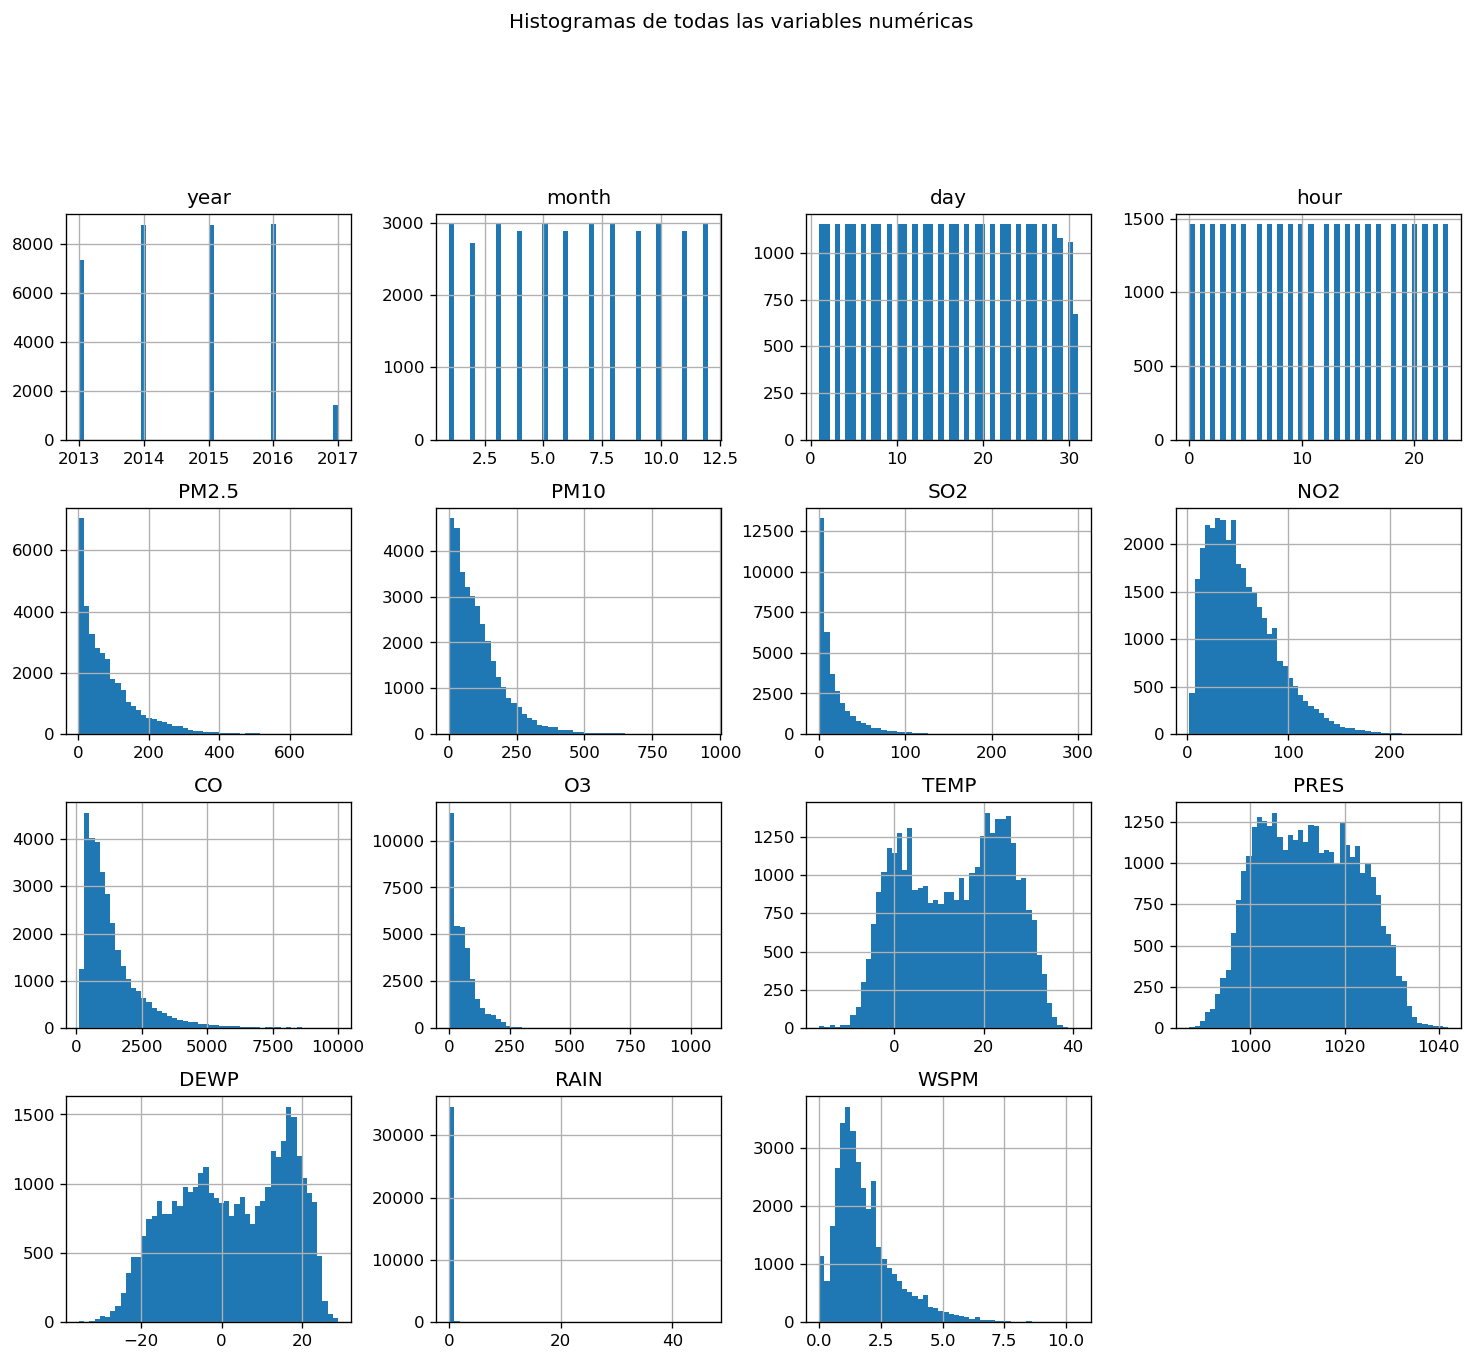

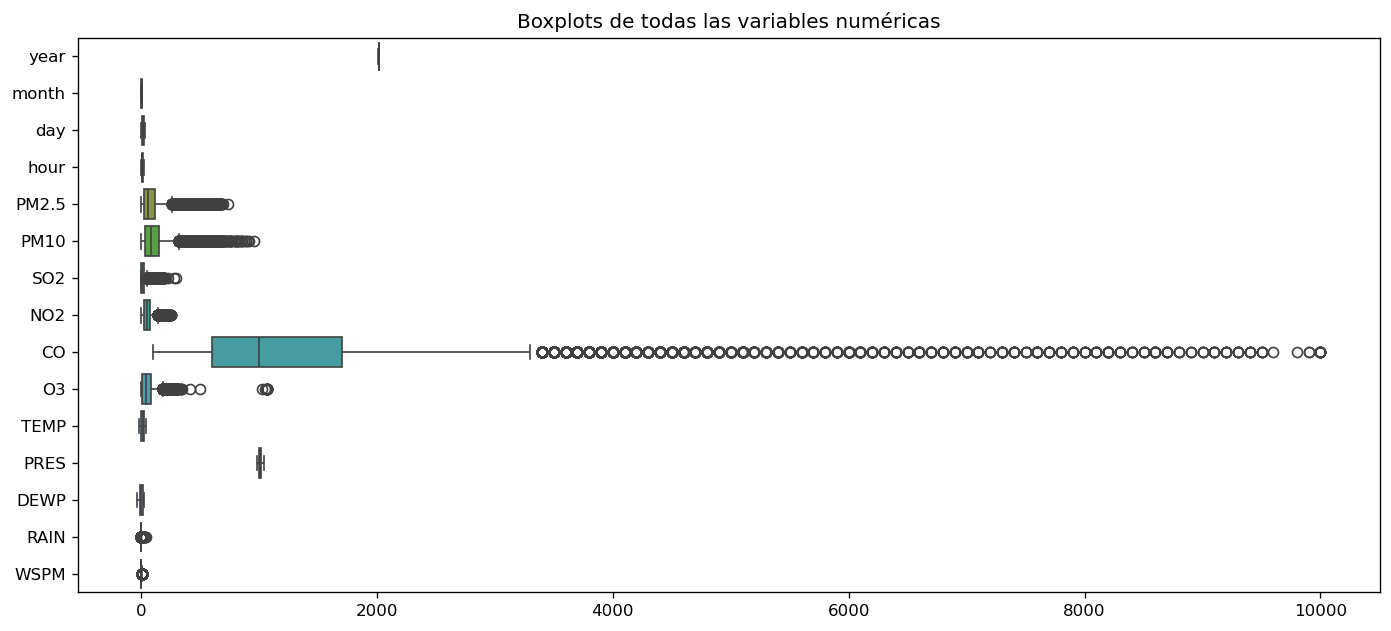


Frecuencias de 'wd' (dirección del viento):
wd
ENE    3861
E      3564
NE     3540
ESE    2706
SW     2481
NW     2466
SSW    1953
NNE    1928
SE     1880
N      1865
WSW    1769
NNW    1693
S      1547
SSE    1402
WNW    1347
W       984
Name: count, dtype: int64


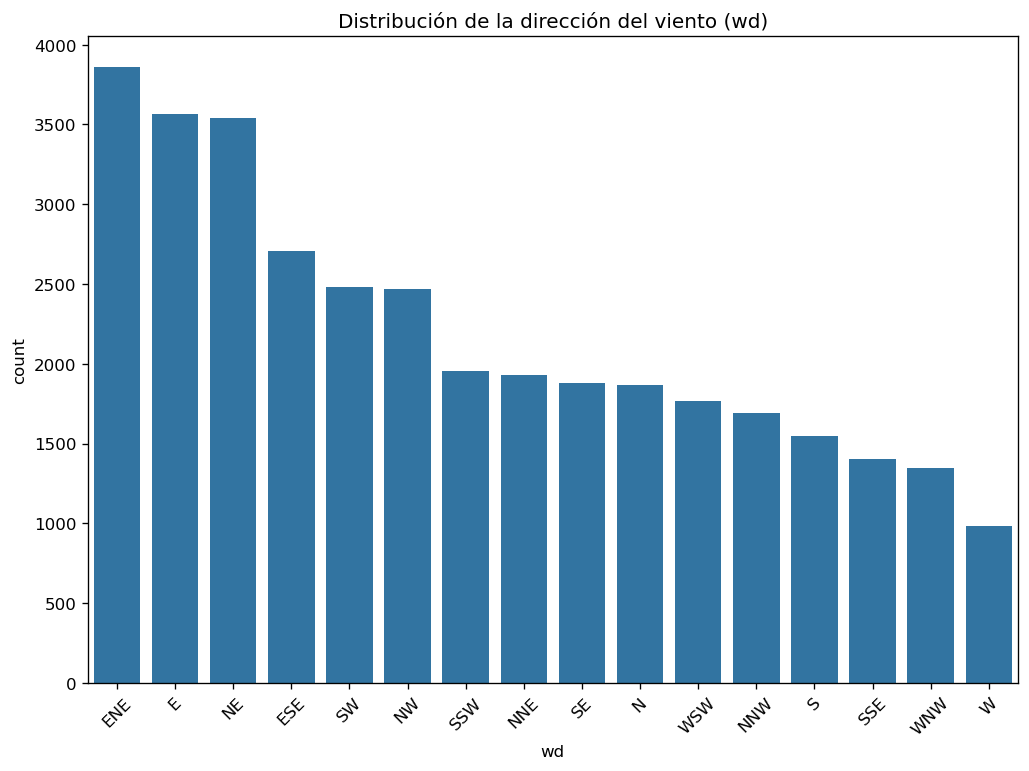

In [ ]:
# ==========================
# 3. ESTADÍSTICAS DESCRIPTIVAS (todas las variables)
# ==========================

# Resumen estadístico de todas las variables numéricas
print("Resumen estadístico general:")
print(df.describe().T)  # .T para transponer y verlo más claro

# Histogramas de todas las variables numéricas
df.hist(figsize=(15,12), bins=50)
plt.suptitle("Histogramas de todas las variables numéricas", y=1.02)
plt.show()

# Boxplots de todas las variables numéricas (para ver outliers)
plt.figure(figsize=(14,6))
sns.boxplot(data=df.select_dtypes(include='number'), orient="h")
plt.title("Boxplots de todas las variables numéricas")
plt.show()

# Variable categórica: dirección del viento (wd)
print("\nFrecuencias de 'wd' (dirección del viento):")
print(df['wd'].value_counts())
sns.countplot(data=df, x='wd', order=df['wd'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribución de la dirección del viento (wd)")
plt.show()

C:\Users\Alejandro Moya\AppData\Local\Temp\ipykernel_876\4016691679.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faltantes.values, y=faltantes.index, palette="viridis")


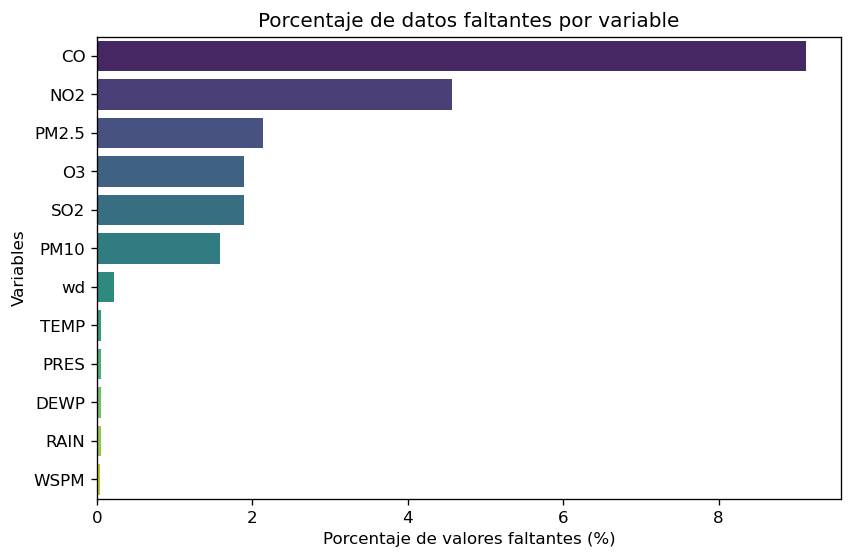

In [6]:
faltantes = df.isnull().mean().sort_values(ascending=False) * 100
faltantes = faltantes[faltantes > 0]  # solo columnas con NA

# --- Gráfica ---
plt.figure(figsize=(8,5))
sns.barplot(x=faltantes.values, y=faltantes.index, palette="viridis")
plt.xlabel("Porcentaje de valores faltantes (%)")
plt.ylabel("Variables")
plt.title("Porcentaje de datos faltantes por variable")
plt.show()